In [4]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# stocks related missing info
import yfinance as yf

# ignoring the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
import seaborn as sns


In [5]:
data = pd.read_csv('sp500_companies.csv')

In [6]:
data.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.078540
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.059721
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015810


In [70]:
# Nombre de valeurs manquantes par colonne
nombre_valeurs_manquantes = data.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
colonnes_manquantes = nombre_valeurs_manquantes[nombre_valeurs_manquantes > 0]

print("Colonnes avec des valeurs manquantes :")
print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
Ebitda               30
Revenuegrowth         1
State                19
Fulltimeemployees     2
dtype: int64


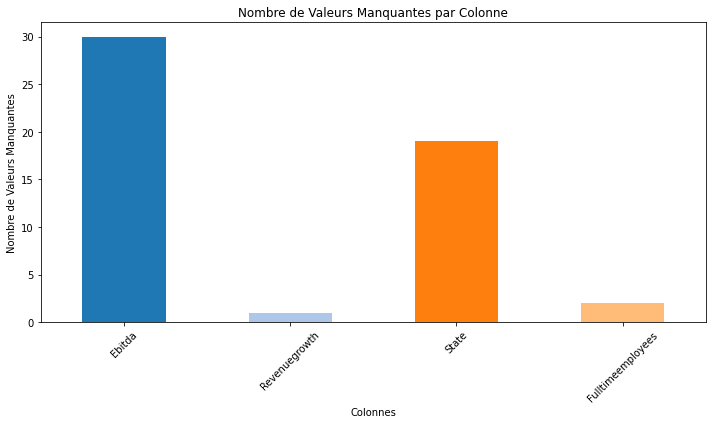

In [80]:
colors = plt.cm.tab20.colors

# Créer un graphique à barres avec des couleurs différentes
plt.figure(figsize=(10, 6))
colonnes_manquantes.plot(kind='bar', color=colors)
plt.title("Nombre de Valeurs Manquantes par Colonne")
plt.xlabel("Colonnes")
plt.ylabel("Nombre de Valeurs Manquantes")
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

### 3.3.3. Distribution of Current Price¶


(0.0, 2100.0)

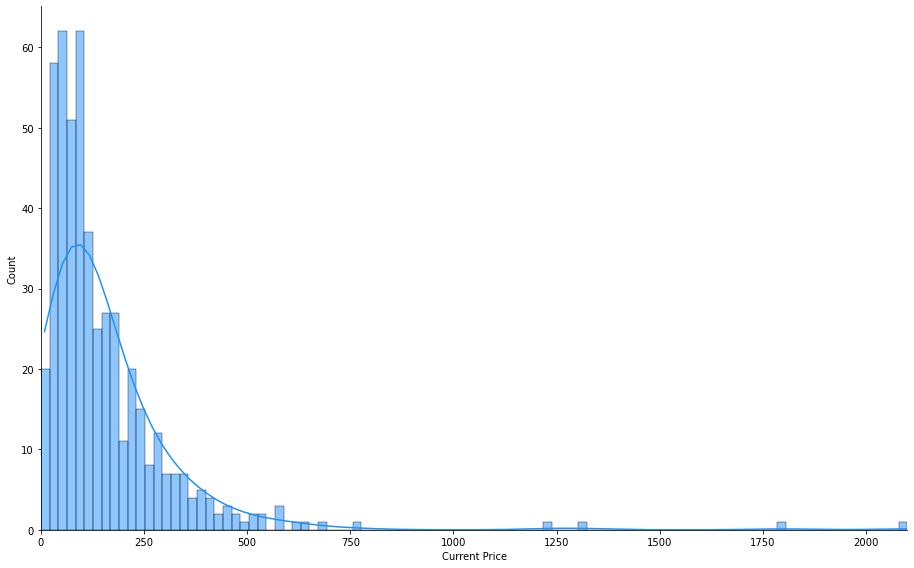

In [7]:
d2 = sns.displot(data=data, x='Currentprice', kde=True, height=8, aspect=1.6, bins=100, binrange=(0, 2100), color='dodgerblue')
d2.set(xlabel='Current Price')
plt.xlim(0, 2100)

###  Which is the leading sector in S&P 500?

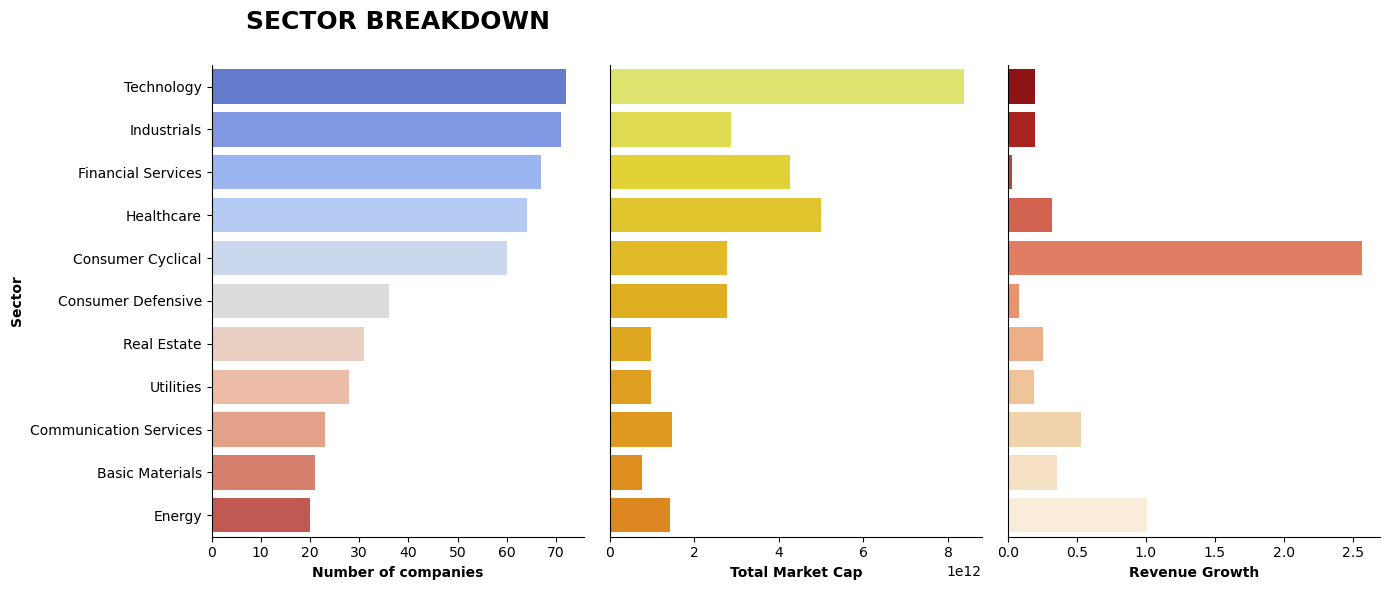

In [8]:
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = data.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();